In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20.0,10.0)

#read the student data from csv file
data=pd.read_csv("wd.csv")
print(data.shape)
data.head()

(28, 3)


,DATE,WASTE PRODUCED(MT),POPULATION(MILLION)
0,2018-01-01,3989.00,2.01
1,2018-01-02,3989.62,2.04
2,2018-01-03,3990.10,2.06
3,2018-01-04,3990.14,2.10
4,2018-01-05,3990.62,2.13


In [2]:
import warnings; 
warnings.simplefilter('ignore')

In [3]:
data.drop(["POPULATION(MILLION)"], axis=1, inplace=True)
data.columns = [ 'ds','y']
data.head()

,ds,y
0,2018-01-01,3989.00
1,2018-01-02,3989.62
2,2018-01-03,3990.10
3,2018-01-04,3990.14
4,2018-01-05,3990.62


In [4]:
from fbprophet import Prophet
m = Prophet(interval_width=0.95,n_changepoints=21, daily_seasonality=True,yearly_seasonality=True)
model = m.fit(data)

Importing plotly failed. Interactive plots will not work.


In [5]:
future = m.make_future_dataframe(periods=99,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3346.372241,3989.00,3989.00,3346.372241,3346.372241,642.627759,642.627759,642.627759,-842.664339,...,5.971780,5.971780,5.971780,1479.320318,1479.320318,1479.320318,0.0,0.0,0.0,3989.00
1,2018-01-02,3156.201751,3989.62,3989.62,3156.201751,3156.201751,833.418249,833.418249,833.418249,-842.664339,...,-0.801322,-0.801322,-0.801322,1676.883910,1676.883910,1676.883910,0.0,0.0,0.0,3989.62
2,2018-01-03,2966.856746,3990.10,3990.10,2966.856746,2966.856746,1023.243254,1023.243254,1023.243254,-842.664339,...,-11.671054,-11.671054,-11.671054,1877.578647,1877.578647,1877.578647,0.0,0.0,0.0,3990.10
3,2018-01-04,2755.278075,3990.14,3990.14,2755.278075,2755.278075,1234.861925,1234.861925,1234.861925,-842.664339,...,-4.927024,-4.927024,-4.927024,2082.453288,2082.453288,2082.453288,0.0,0.0,0.0,3990.14
4,2018-01-05,2543.691107,3990.62,3990.62,2543.691107,2543.691107,1446.928893,1446.928893,1446.928893,-842.664339,...,-2.158280,-2.158280,-2.158280,2291.751511,2291.751511,2291.751511,0.0,0.0,0.0,3990.62


In [6]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
122,2018-05-03,-27626.799036,-4583.586696,16184.571585,-37438.705100,-16670.546819,32855.118404,32855.118404,32855.118404,-842.664339,...,-4.927024,-4.927024,-4.927024,33702.709767,33702.709767,33702.709767,0.0,0.0,0.0,5228.319368
123,2018-05-04,-27886.839267,-4408.387758,16744.434847,-37850.313065,-16697.490461,33441.925308,33441.925308,33441.925308,-842.664339,...,-2.158280,-2.158280,-2.158280,34286.747926,34286.747926,34286.747926,0.0,0.0,0.0,5555.086040
124,2018-05-05,-28146.879499,-4286.931795,17307.965112,-38318.270843,-16723.373936,34031.339048,34031.339048,34031.339048,-842.664339,...,5.484382,5.484382,5.484382,34868.519006,34868.519006,34868.519006,0.0,0.0,0.0,5884.459550
125,2018-05-06,-28406.919730,-4086.960399,17889.193112,-38726.311106,-16750.157596,34639.350707,34639.350707,34639.350707,-842.664339,...,8.101518,8.101518,8.101518,35473.913528,35473.913528,35473.913528,0.0,0.0,0.0,6232.430977
126,2018-05-07,-28666.959961,-3847.149499,18477.046562,-39135.454845,-16811.258784,35288.305347,35288.305347,35288.305347,-842.664339,...,5.971780,5.971780,5.971780,36124.997905,36124.997905,36124.997905,0.0,0.0,0.0,6621.345385


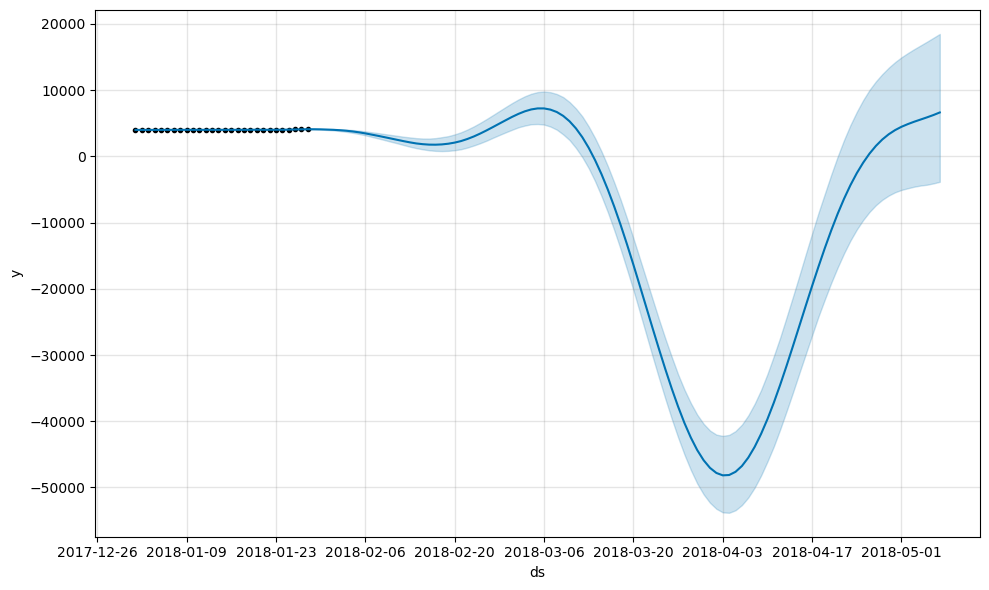

In [7]:
plot1 = m.plot(forecast)

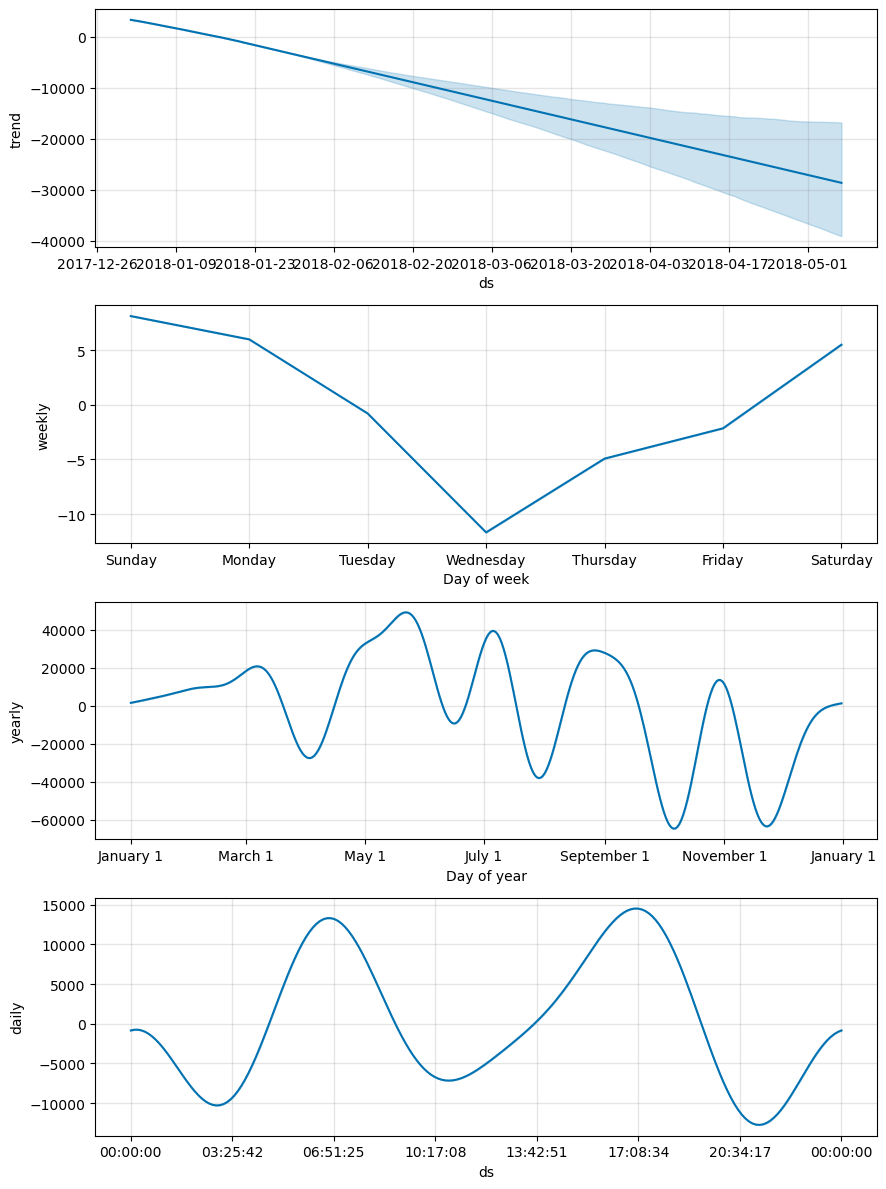

In [8]:
plt2 = m.plot_components(forecast)

In [9]:
test_data = data[-5:] 
actual_values = test_data['y']  # Replace 'test_data' with your actual test set
predicted_values = forecast['yhat'].tail(len(test_data))  # Extract predicted values for the corresponding period
loss_percentage = abs((actual_values - predicted_values) / actual_values) * 100
print("loss percentage",loss_percentage)


loss percentage 23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
122   NaN
123   NaN
124   NaN
125   NaN
126   NaN
dtype: float64


In [10]:
from sklearn.metrics import precision_score
data1=data.head(28)
data2=forecast.tail(28)
threshold = data['y'].mean() # Set your threshold based on the problem requirements
binary_predicted_values = data2['yhat'].apply(lambda x: 1 if x >= threshold else 0)
binary_actual_values = data1['y'].apply(lambda x: 1 if x >= threshold else 0)
print(binary_predicted_values)
print("===")
print(binary_actual_values)
precision = precision_score(binary_actual_values, binary_predicted_values)
print(precision)


99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
120    1
121    1
122    1
123    1
124    1
125    1
126    1
Name: yhat, dtype: int64
===
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    1
24    1
25    1
26    1
27    1
Name: y, dtype: int64
0.7142857142857143
